In [24]:
#coding:utf-8
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

1.图像处理

In [4]:
# pic_path  = 'E:\photos\R_C.jpg'  #dtype=uint8
pic_path  = 'E:\photos\lenna.png'
img = plt.imread(pic_path)
print(img[0:2], img.shape)

[[[0.8862745  0.5372549  0.49019608]
  [0.8862745  0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156866]
  ...
  [0.9019608  0.5803922  0.47843137]
  [0.8666667  0.50980395 0.43137255]
  [0.78431374 0.3882353  0.3529412 ]]

 [[0.8862745  0.5372549  0.49019608]
  [0.8862745  0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156866]
  ...
  [0.9019608  0.5803922  0.47843137]
  [0.8666667  0.50980395 0.43137255]
  [0.78431374 0.3882353  0.3529412 ]]] (512, 512, 3)


In [5]:
# .png图片在这里的存储格式是0到1的浮点数，所以要扩展到255再计算
if pic_path[-4:] == '.png':
    img = img * 255
img = img.mean(axis=-1)    #取-1最后1维度,均值就是灰度化了
print(img, img.shape)

[[162.66667  162.66667  164.33333  ... 166.66667  153.66667  129.66667 ]
 [162.66667  162.66667  164.33333  ... 166.66667  153.66667  129.66667 ]
 [162.66667  162.66667  164.33333  ... 166.66667  153.66667  129.66667 ]
 ...
 [ 54.        54.        59.       ... 110.       105.333336 106.      ]
 [ 53.666668  53.666668  63.333332 ... 109.333336 111.       113.333336]
 [ 53.666668  53.666668  63.333332 ... 109.333336 111.       113.333336]] (512, 512)


2.高斯平滑

In [6]:
# sigma = 1.52  #高斯平滑时的高斯核参数，标准差，可调
sigma = 0.5   #高斯平滑时的高斯核参数，标准差，可调
kernel_size = int(np.round(3*sigma)*2+1 ) # 一般高斯核尺寸通过计算得到：6*sigma+1 要保证尺寸的宽度和高度都为奇数
if kernel_size % 2 == 0:   # 最好是奇数
    kernel_size += 1
radius = kernel_size // 2  #
print(kernel_size)

5


In [7]:
#通过二维高斯公式计算高斯核
constant = 1/(2 * math.pi * sigma**2)  #公式前面常数
gaussian_kernel = np.zeros([kernel_size, kernel_size])
for i in range(0, kernel_size, 1):
    for j in range(0, kernel_size, 1):
        x = i - radius
        y = j - radius
        gaussian_kernel[i, j] = constant * math.exp(-1/(2*sigma**2) * (x**2 + y**2))
#归一化
gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()
print(gaussian_kernel)

[[6.96247819e-08 2.80886418e-05 2.07548550e-04 2.80886418e-05
  6.96247819e-08]
 [2.80886418e-05 1.13317669e-02 8.37310610e-02 1.13317669e-02
  2.80886418e-05]
 [2.07548550e-04 8.37310610e-02 6.18693507e-01 8.37310610e-02
  2.07548550e-04]
 [2.80886418e-05 1.13317669e-02 8.37310610e-02 1.13317669e-02
  2.80886418e-05]
 [6.96247819e-08 2.80886418e-05 2.07548550e-04 2.80886418e-05
  6.96247819e-08]]


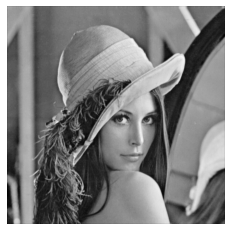

In [8]:
dx, dy = img.shape
new_img = np.zeros(img.shape)  # 存储平滑之后的图像，zeros函数得到的是浮点型数据
img_pad = np.pad(img, ((radius, radius), (radius, radius)), 'constant') #参数img，（0行，1列）， ‘constant’示连续填充相同的值，个轴可以分别指定填充值，constant_values=（x, y）时前面用x填充，后面用y填充，缺省值填充0
# print(img_pad)
for i in range(dx):
    for j in range(dy):
        new_img[i, j] = np.sum(img_pad[i: i+kernel_size, j: j+kernel_size] * gaussian_kernel)
plt.figure(1)  #num:图像编号或名称，数字为编号 ，字符串为名称
plt.imshow(new_img.astype(np.uint8), cmap='gray') ## 此时的img_new是255的浮点型数据，强制类型转换才可以，gray灰阶。np.astype()  转换数据类型
plt.axis('off')  #关闭坐标轴
plt.show()

3.求梯度。以下两个是滤波求梯度用的sobel矩阵（检测图像中的水平、垂直和对角边缘）

angle:
 [[-9.99303523e-01 -1.22245445e+01  6.46250712e+02 ...  1.46910139e+01
   4.48613640e+00  9.16069160e-01]
 [-7.63497466e-02 -9.33991375e-01  4.93754670e+01 ...  1.12243694e+00
   3.42754098e-01  6.99903949e-02]
 [-1.84139849e-04 -2.22528495e-03  1.14959514e-01 ...  2.06597743e-03
   5.91380634e-04  1.16417186e-04]
 ...
 [ 3.58827369e-02  1.00854866e-01 -2.86580584e-01 ... -1.66810185e+01
   4.63945334e-01  5.28743280e-02]
 [ 8.03877952e-02  4.11917705e-01  6.99023208e-01 ...  4.53491317e+00
  -7.77290944e-01 -3.94425152e-02]
 [ 9.88366708e-01  5.62979756e+00  1.27015692e+01 ...  4.65879142e+01
  -1.82157412e+01 -1.00707830e+00]]


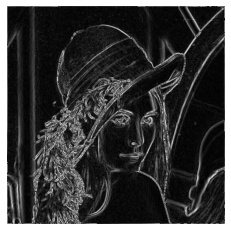

In [18]:
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
img_newX = np.zeros(new_img.shape)  #存储梯度图像
img_newY = np.zeros([dx, dy])
img_new = np.zeros(new_img.shape)
img_pad = np.pad(new_img, ((1, 1), (1, 1)), 'constant') ## 边缘填补，根据上面矩阵结构所以写1
for i in range(dx):
    for j in range(dy):
        img_newX[i, j] = np.sum(img_pad[i:i+3, j:j+3] * sobel_kernel_x) #x方向
        img_newY[i, j] = np.sum(img_pad[i:i+3, j:j+3] * sobel_kernel_y) #y方向
        img_new[i, j] = np.sqrt(img_newX[i,j]**2 + img_newY[i,j]**2)
img_newX[img_newX == 0] = 0.00000001  ##防止除数为零, 解析如下：
angle = img_newY / img_newX
print('angle:\n', angle)
plt.figure(2)
plt.imshow(img_new.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()

In [77]:
##测试img_newX
a = np.array([[1.,1,1],[1,1,1]])
print(a)
img_newxx = np.array([[0,1.,0],[2, 3, 4]])
print(img_newxx)
print(img_newxx.shape,'\n', img_newxx==0)
print('-->\n',img_newxx[img_newxx==0])   #对整个矩阵中中为零的赋值为0.1
img_newxx[img_newxx==0] = 0.1   #原数组必须是浮点，整型替换不了0
print('赋值后的矩阵：', img_newxx)

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 1. 0.]
 [2. 3. 4.]]
(2, 3) 
 [[ True False  True]
 [False False False]]
-->
 [0. 0.]
赋值后的矩阵： [[0.1 1.  0.1]
 [2.  3.  4. ]]


4.非极大值抑制

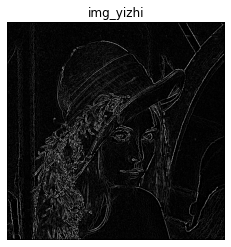

In [17]:
img_yizhi = np.zeros(img_new.shape)
for i in range(1, dx-1):       #未考虑边界
    for j in range(1, dy-1):
        flag = True  #在8邻域内是否要抹去做个标记
        temp = img_new[i-1:i+2, j-1:j+2]  #3x3,使用线性插值法判断抑制与否
        if angle[i,j] <= -1:     # 使用线性插值法判断抑制与否
            num1 = (temp[0,1] - temp[0,0])/abs(angle[i,j]) + temp[0,0] #(0,1)*w + (1-w)*(0,0) w=d|x/dy|
            num2 = (temp[2,1] - temp[2,2])/abs(angle[i,j]) + temp[2,2] #(2,1)*w + (1-w)*(2,2)
            if not (img_new[i,j] > max(num1, num2)):
                flag = False
        elif angle[i, j] > 1:
            num1 = (temp[0,1] - temp[0,2])/angle[i,j] + temp[0,2] #(0,1)*w + (1-w)*(0,2)
            num2 = (temp[2,1] - temp[2,0])/angle[i,j] + temp[2,0] #(2,1)*w + (1-w)*(2,0)
            if  not (img_new[i, j] > max(num1, num2)):
                flag = False
        elif angle[i, j] > 0:
            num1 = (temp[1,2] - temp[0,2])*angle[i,j] + temp[0,2] #(1,2)*w + (1-w)*(0,2) w=|dy/dx|
            num2 = (temp[1,0] - temp[2,0])*angle[i,j] + temp[2,0] #(1,0)*w + (1-w)*(2,0)
            if not (img_new[i, j] > max(num1, num2)):
                flag = False
        elif angle[i, j] < 0:
            num1 = (temp[1,0] - temp[0,0])*abs(angle[i,j]) + temp[0,0] #(1,0)*w + (1-w)*(0,0)
            num2 = (temp[1,2] - temp[2,2])*abs(angle[i,j]) + temp[2,2] #(1,2)*w + (1-w)*(2,2)
            if not (img_new[i, j] > max(num1, num2)):
                flag = False
        if flag:
            img_yizhi[i, j] = img_new[i,j]
plt.figure(3)
plt.title('img_yizhi')
plt.imshow(img_yizhi.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()

4.双阈值检测，连接边缘。遍历所有一定是变的点，查看8领域是否存在有其他可能是边的点，进栈

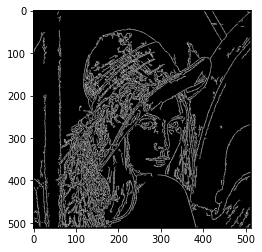

In [30]:
lower_boundary = img_new.mean() * 0.5
high_boundary = lower_boundary *3  #这里设置高阈值是低阈值的三倍
zhan = []
for i in range(1, img_yizhi.shape[0]-1):   #未处理边界
    for j in range(1, img_yizhi.shape[1]-1):
        if img_yizhi[i, j] >= high_boundary:   #取，一定是边的点
            img_yizhi[i, j] = 255
            zhan.append([i, j])
        elif img_yizhi[i, j] <= lower_boundary:   #舍弃
            img_yizhi[i, j] = 0
        
while not len(zhan) == 0:   #条件为假时成立
    temp1, temp2 = zhan.pop()   # 出栈 ##pop() 函数用于移除列表中的一个元素（默认最后一个元素），并且返回该元素的值。
    a = img_yizhi[temp1-1:temp1+2, temp2-1:temp2+2]  # 3x3
    if (a[0, 0] < high_boundary) and (a[0, 0] > lower_boundary):
        img_yizhi[temp1-1, temp2-1] = 255   #把这个像素点标记为边缘
        zhan.append([temp1-1, temp2-1])   #进栈
    if lower_boundary < a[0, 1] < high_boundary:
        img_yizhi[temp1-1, temp2] = 255
        zhan.append([temp1-1, temp2])
    if lower_boundary < a[0, 2] <high_boundary:
        img_yizhi[temp1-1, temp2+1] = 255
        zhan.append([temp1-1, temp2+1])
    if lower_boundary < a[1, 0] < high_boundary:
        img_yizhi[temp1, temp2-1] = 255
        zhan.append([temp1, temp2-1])
    if lower_boundary < a[1, 2] < high_boundary:
        img_yizhi[temp1, temp2+1] = 255
        zhan.append([temp1, temp2+1])
    if lower_boundary < a[2, 0] < high_boundary:
        img_yizhi[temp1+1, temp2-1] = 255
        zhan.append([temp1+1, temp2-1])
    if lower_boundary < a[2, 1] < high_boundary:
        img_yizhi[temp1+1, temp2] = 255
        zhan.append([temp1+1, temp2])
    if lower_boundary < a[2, 2] < high_boundary:
        img_yizhi[temp1+1, temp2+1] = 255
        zhan.append([temp1+1, temp2+1])

for i in range(img_yizhi.shape[0]):
    for j in range(img_yizhi.shape[1]):
        if img_yizhi[i, j] != 0 and img_yizhi[i, j] != 255:
            img_yizhi[i, j] = 0

#绘图
plt.figure(4)
plt.imshow(img_yizhi.astype(np.uint8), cmap='gray')
plt.axis('on')
plt.show()

In [1]:
import os
print(os.path.abspath('.'))

C:\Users\Huang\cv_Ts
